In [1]:
from sklearn.feature_extraction.text import TfidfTransformer  # TF-IDF向量转换类
from sklearn.feature_extraction.text import CountVectorizer  # 词频矩阵
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.multiclass import OneVsRestClassifier  # 结合SVM的多分类组合辅助器
import sklearn.svm as svm  # SVM辅助器
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate

from os import listdir
import os
import jieba

from time import time
import datetime

In [2]:
def getStopWord(inputPath):
    with open(inputPath, "r", encoding='utf-8') as file:
        content = file.read()
        file.close()
    stopWordList = content.splitlines()
    return stopWordList

stopwords_filePath = "B:\\code_master\\code\\03DataSet\\停用词01.txt"
stopWordList = getStopWord(stopwords_filePath)

In [3]:
# getDataLabelList() : 取数据、标签列表
def getDataLabelList(inputPath):
    dataList = []
    labelList = []
    fatherLists = listdir(inputPath) # 目录 ['xx罪.txt','xx罪.txt',...]
    for eachDir in fatherLists:  # 遍历目录中各个文件
        eachPath = inputPath +"\\"+ eachDir  # 保存目录中每个文件路径，便于遍历二级文件  G:\\dataSetTest\\xx罪.txt
        with open(eachPath, 'r', encoding="utf-8") as f:
            content = f.readlines()
            for i in range(len(content)):
                labelList.append(eachDir.replace('.txt',''))
                dataList.append(" ".join(jieba.cut(content[i].strip())))
            f.close()
    return dataList, labelList



# 训练集的特征、标签列表
fileTrainPath = "B:\\code_master\\code\\03DataSet\\dataTrainSet_2To50"
dataTrain_list, labelTrain_list = getDataLabelList(fileTrainPath)
# 测试集的特征、标签列表
fileTestPath = "B:\\code_master\\code\\03DataSet\\dataTestSet_2To50"
dataTest_list, labelTest_list = getDataLabelList(fileTestPath)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\bigdata\AppData\Local\Temp\jieba.cache
Loading model cost 0.741 seconds.
Prefix dict has been built successfully.


In [4]:
# getPreResult() : 输入案例并返回预测结果
vectorizer = CountVectorizer(stop_words=stopWordList
                             # , min_df=0.02
                             # , max_df=0.5
                             , max_features= 5000
                             )  # 完善min_df的取值 ，学习曲线？？？
# 其他类别专用分类，该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
transformer = TfidfTransformer()  # 该类会统计每个词语的tf-idf权值
#对训练集向量化
cipinTrain = vectorizer.fit_transform(dataTrain_list)
tfidfTrain = transformer.fit_transform(cipinTrain)  # if-idf中的输入为已经处理过的词频矩阵
print("(tfidfTrain.toarray()).shape : ")
print((tfidfTrain.toarray()).shape)
#对测试集向量化
cipinTest = vectorizer.transform(dataTest_list)
tfidfTest = transformer.transform(cipinTest)
print("(tfidfTest.toarray()).shape : ")
print((tfidfTest.toarray()).shape)

# solver_list = ['newton-cg','lbfgs','sag','saga']
# for i in range(len(solver_list)):
for multi_class in ('multinomial','ovr'):
    # print("调参solver: ",solver_list[i])
    print("multi_class:",multi_class)
    #用训练集训练模型
    # model = OneVsRestClassifier(svm.SVC(kernel='linear')) #实例化模型
    LR_model_2To50 = LogisticRegression(
                                   # multi_class="multinomial"
                                  multi_class=multi_class
                                  # , solver=solver_list[i]
                                  # , random_state=2
                                  )
    LR_model_2To50 = LR_model_2To50.fit(tfidfTrain, labelTrain_list)

    ytrain_pred = LR_model_2To50.predict(tfidfTrain)
    print("对训练集进行模型评估, Start running time: %s" % datetime.datetime.now())
    print("accuracy_score :", metrics.accuracy_score(labelTrain_list, ytrain_pred))
    print("")


    ytest_pred = LR_model_2To50.predict(tfidfTest)
    print("对测试集集进行模型评估, Start running time: %s" % datetime.datetime.now())
    print("accuracy_score :" , metrics.accuracy_score(labelTest_list, ytest_pred))
    print("")

(tfidfTrain.toarray()).shape : 
(773, 5000)
(tfidfTest.toarray()).shape : 
(383, 5000)
multi_class: multinomial
对训练集进行模型评估, Start running time: 2022-04-18 23:56:04.272074
accuracy_score : 0.8305304010349288

对测试集集进行模型评估, Start running time: 2022-04-18 23:56:04.277061
accuracy_score : 0.577023498694517

multi_class: ovr
对训练集进行模型评估, Start running time: 2022-04-18 23:56:05.555653
accuracy_score : 0.8227684346701164

对测试集集进行模型评估, Start running time: 2022-04-18 23:56:05.562668
accuracy_score : 0.5744125326370757



In [5]:
import numpy as np
import matplotlib.pyplot as plt

lr = []
lrtest = []

for i in np.arange(1,201,10):
    LR_model_2To50 = LogisticRegression(
        multi_class="multinomial"
        , solver = 'saga'
        , max_iter=i 
    )
    LR_model_2To50 = LR_model_2To50.fit(tfidfTrain, labelTrain_list)
    ytrain_pred = LR_model_2To50.predict(tfidfTrain)
    ytest_pred = LR_model_2To50.predict(tfidfTest)
    
    lr.append(metrics.accuracy_score(labelTrain_list, ytrain_pred))
    lrtest.append(metrics.accuracy_score(labelTest_list, ytest_pred))
print(lr)
print(lrtest)

C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  Conve

[0.6416558861578266, 0.8382923673997412, 0.8369987063389392, 0.8369987063389392, 0.8369987063389392, 0.8369987063389392, 0.8382923673997412, 0.8344113842173351, 0.8369987063389392, 0.8357050452781372, 0.8357050452781372, 0.8318240620957309, 0.833117723156533, 0.833117723156533, 0.8305304010349288, 0.833117723156533, 0.833117723156533, 0.8318240620957309, 0.833117723156533, 0.8318240620957309]
[0.45691906005221933, 0.5796344647519582, 0.5796344647519582, 0.5796344647519582, 0.5796344647519582, 0.5822454308093995, 0.5796344647519582, 0.577023498694517, 0.5796344647519582, 0.577023498694517, 0.577023498694517, 0.577023498694517, 0.577023498694517, 0.577023498694517, 0.577023498694517, 0.577023498694517, 0.577023498694517, 0.577023498694517, 0.577023498694517, 0.577023498694517]


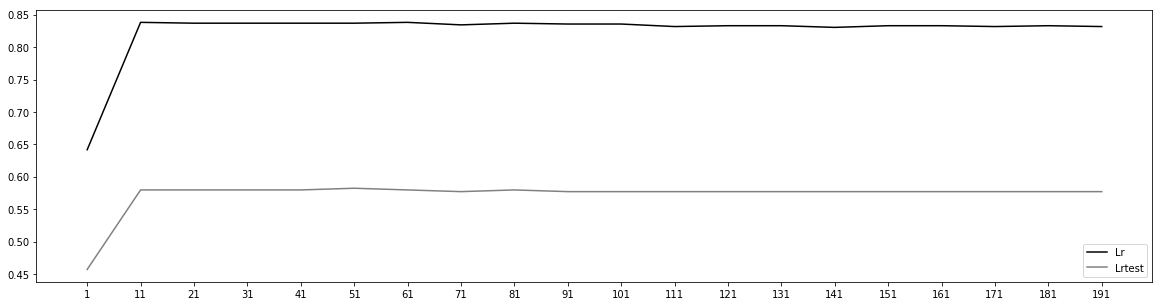

In [6]:
graph = [lr,lrtest]
color = ["black","gray"]
label = ["Lr","Lrtest"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
#         plt.plot(np.arange(1,201,10),lr,'black',label='lr')
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [9]:
solver_list = ['newton-cg', 'lbfgs', 'sag', 'saga']
for i in range(len(solver_list)):
    print("调参solver: ", solver_list[i])
    #用训练集训练模型
    # model = OneVsRestClassifier(svm.SVC(kernel='linear')) #实例化模型
    LR_model_2To50 = LogisticRegression(
        multi_class="multinomial"
        # multi_class=multi_class
        , solver= solver_list[i]
        , max_iter=20
        # , random_state=2

                                  )
    LR_model_2To50 = LR_model_2To50.fit(tfidfTrain, labelTrain_list)

    ytrain_pred = LR_model_2To50.predict(tfidfTrain)
    print("对训练集进行模型评估, Start running time: %s" % datetime.datetime.now())
    print("accuracy_score :", metrics.accuracy_score(labelTrain_list, ytrain_pred))
    print("")


    ytest_pred = LR_model_2To50.predict(tfidfTest)
    print("对测试集集进行模型评估, Start running time: %s" % datetime.datetime.now())
    print("accuracy_score :" , metrics.accuracy_score(labelTest_list, ytest_pred))
    print("")


调参solver:  newton-cg
对训练集进行模型评估, Start running time: 2022-04-19 00:01:02.591903
accuracy_score : 0.8305304010349288

对测试集集进行模型评估, Start running time: 2022-04-19 00:01:02.600879
accuracy_score : 0.577023498694517

调参solver:  lbfgs


C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


对训练集进行模型评估, Start running time: 2022-04-19 00:01:04.019098
accuracy_score : 0.8305304010349288

对测试集集进行模型评估, Start running time: 2022-04-19 00:01:04.024084
accuracy_score : 0.577023498694517

调参solver:  sag


C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


对训练集进行模型评估, Start running time: 2022-04-19 00:01:04.557662
accuracy_score : 0.8227684346701164

对测试集集进行模型评估, Start running time: 2022-04-19 00:01:04.562649
accuracy_score : 0.577023498694517

调参solver:  saga
对训练集进行模型评估, Start running time: 2022-04-19 00:01:05.225882
accuracy_score : 0.8382923673997412

对测试集集进行模型评估, Start running time: 2022-04-19 00:01:05.230867
accuracy_score : 0.5796344647519582



C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  Conve

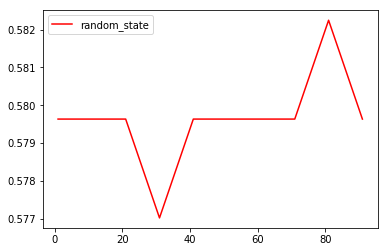

In [10]:
import matplotlib.pyplot as plt
test = []
for i in np.arange(1,101,10):
    
    LR_model_2To50 = LogisticRegression(
    #     penalty="l1"
    #     , C = 0.5
        multi_class="multinomial"
        # multi_class=multi_class
        , solver= 'saga'
        , max_iter=20
        , random_state=i
     )
    LR_model_2To50 = LR_model_2To50.fit(tfidfTrain, labelTrain_list)
    score = LR_model_2To50.score(tfidfTest, labelTest_list)
    test.append(score)
plt.plot(np.arange(1,101,10),test,color="red",label="random_state")
plt.legend()
plt.show()

In [14]:
LR_model_2To50 = LogisticRegression(
#     penalty="l1"
#     , C = 0.5
    multi_class="multinomial"
    # multi_class=multi_class
    , solver= 'saga'
    , max_iter=20
    , random_state=80
     )
LR_model_2To50 = LR_model_2To50.fit(tfidfTrain, labelTrain_list)

ytrain_pred = LR_model_2To50.predict(tfidfTrain)
print("对训练集进行模型评估, Start running time: %s" % datetime.datetime.now())
print("classification_report: ")
print(classification_report(labelTrain_list, ytrain_pred))
# print("accuracy_score :", metrics.accuracy_score(labelTrain_list, ytrain_pred))
print("")


ytest_pred = LR_model_2To50.predict(tfidfTest)
print("对测试集集进行模型评估, Start running time: %s" % datetime.datetime.now())
print("classification_report: ")
print(classification_report(labelTest_list, ytest_pred))
# print("accuracy_score :" , metrics.accuracy_score(labelTest_list, ytest_pred))
print("")

对训练集进行模型评估, Start running time: 2022-04-19 00:09:51.923313
classification_report: 
                   precision    recall  f1-score   support

         为亲友非法牟利罪       0.00      0.00      0.00         3
         传染病防治失职罪       0.00      0.00      0.00         1
          侵犯商业秘密罪       0.79      1.00      0.88        19
          侵犯通信自由罪       0.00      0.00      0.00         1
           信用证诈骗罪       1.00      0.86      0.92         7
            倒卖文物罪       0.80      1.00      0.89        32
            假冒专利罪       0.00      0.00      0.00         2
      出具证明文件重大失实罪       1.00      0.90      0.95        10
         出售出入境证件罪       1.00      1.00      1.00         9
            刑讯逼供罪       1.00      0.89      0.94         9
       利用未公开信息交易罪       1.00      0.80      0.89         5
         劫夺被押解人员罪       1.00      0.71      0.83         7
            医疗事故罪       1.00      1.00      1.00        14
          危害公共安全罪       0.00      0.00      0.00         6
            变造货币罪       0.00   

C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bigdata\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: